`--- Day 3: No Matter How You Slice It ---`

In [1]:
import unittest
from collections import defaultdict

In [2]:
input_lines = open('input.txt', 'r').read().splitlines()

The problem is that many of the claims overlap, causing two or more claims to cover part of the same areas. For example, consider the following claims:
```
#1 @ 1,3: 4x4
#2 @ 3,1: 4x4
#3 @ 5,5: 2x2
```
Visually, these claim the following areas:
```
........
...2222.
...2222.
.11XX22.
.11XX22.
.111133.
.111133.
........
```
The four square inches marked with X are claimed by both 1 and 2. (Claim 3, while adjacent to the others, does not overlap either of them.)


# Test Setup

In [3]:
test_lines = ['#1 @ 1,3: 4x4', '#2 @ 3,1: 4x4', '#3 @ 5,5: 2x2']

test1_results = [(1, 1, 3, 4, 4), (2, 3, 1, 4, 4), (3, 5, 5, 2, 2)]

r1 = tuple((i, j) for i in range(1, 5) for j in range(3, 7))
test_res1 = (1, r1)

r2 = tuple((i, j) for i in range(3, 7) for j in range(1, 5))
test_res2 = (2, r2)

r3 = tuple((i, j) for i in range(5, 7) for j in range(5, 7))
test_res3 = (3, r3)

test2_results = [test_res1, test_res2, test_res3]

test3_results = {                                (3, 1): (2,),   (4, 1): (2,),   (5, 1): (2,),   (6, 1): (2,),
                                                 (3, 2): (2,),   (4, 2): (2,),   (5, 2): (2,),   (6, 2): (2,),
                 (1, 3): (1,),   (2, 3): (1,),   (3, 3): (1, 2), (4, 3): (1, 2), (5, 3): (2,),   (6, 3): (2,),
                 (1, 4): (1,),   (2, 4): (1,),   (3, 4): (1, 2), (4, 4): (1, 2), (5, 4): (2,),   (6, 4): (2,),
                 (1, 5): (1,),   (2, 5): (1,),   (3, 5): (1,),   (4, 5): (1,),   (5, 5): (3,),   (6, 5): (3,),
                 (1, 6): (1,),   (2, 6): (1,),   (3, 6): (1,),   (4, 6): (1,),   (5, 6): (3,),   (6, 6): (3,)}

In [4]:
class TestIt(unittest.TestCase):
    
    def test_split_claim(self):
        for claim, res in zip(test_lines, test1_results):
            with self.subTest(claim=claim):
                self.assertEqual(split_claim(claim), res)
                
    def test_process_claim(self):
        for claim, res in zip(test_lines, test2_results):
            with self.subTest(claim=claim):
                self.assertEqual(process_claim(claim), res)
                
    def test_make_grid(self):
        self.assertEqual(make_grid(test_lines), test3_results)

# Define the required functions

In [5]:
def split_claim(claim): # '#1 @ 1,3: 4x4'
    
    '''Parse the claim string and return the elements as a tuple of integers'''
    
    claim_id, claim = claim.split(' @ ')
    x,        claim = claim.split(',')
    y,        claim = claim.split(': ')
    w,        h     = claim.split('x')
    
    claim_id = claim_id.replace('#', '')
    
    return tuple(map(int, (claim_id, x, y, w, h)))
    
def process_claim(claim):
    
    '''Process the claim to return a tuple of the claim id and a tuple of the coordinates of all included 1" squares'''
    
    claim_id, x, y, w, h = split_claim(claim)
    
    coords = tuple((i, j) for i in range(x, x + w) for j in range(y, y + h))
    
    return (claim_id, coords)

def make_grid(claims):
    grid = defaultdict(tuple)
    for claim in claims:
        claim_id, coords = process_claim(claim)
        for coord in coords:
            grid[coord] += (claim_id,)
    return dict(grid)

# Run the tests

In [6]:
suite = unittest.TestLoader().loadTestsFromTestCase(TestIt)
unittest.TextTestRunner(verbosity=2).run(suite)

test_make_grid (__main__.TestIt) ... ok
test_process_claim (__main__.TestIt) ... ok
test_split_claim (__main__.TestIt) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.016s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

# Part 1

In [7]:
fabric_grid = make_grid(input_lines)

In [8]:
print(f'Part 1: {len([square for square in fabric_grid if len(fabric_grid[square]) >= 2])}')

Part 1: 101565


# Part 2

In [9]:
all_claim_ids = set(x[0] for x in (split_claim(claim) for claim in input_lines))

In [10]:
overlapping_claim_ids = set()

for square in [x for x in fabric_grid if len(fabric_grid[x]) >= 2]:
    for claim in fabric_grid[square]:
        overlapping_claim_ids.add(claim)

In [11]:
print(f'The set of non-overlapping claims is: {all_claim_ids - overlapping_claim_ids}')

The set of non-overlapping claims is: {656}


# Visualise

In [12]:
set(len(fabric_grid[x]) for x in fabric_grid)

{1, 2, 3, 4, 5, 6}

In [13]:
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
(xmin, xmax), (ymin, ymax) = list(map(lambda x: (min(x), max(x)), zip(*(sq for sq in fabric_grid))))
image_grid = []
for x in range(xmin, xmax + 1):
    column = []
    for y in range(ymin, ymax + 1):
        if (x, y) in fabric_grid:
            column.append(len(fabric_grid[(x, y)]))
        else:
            column.append(0)
    image_grid.append(column)

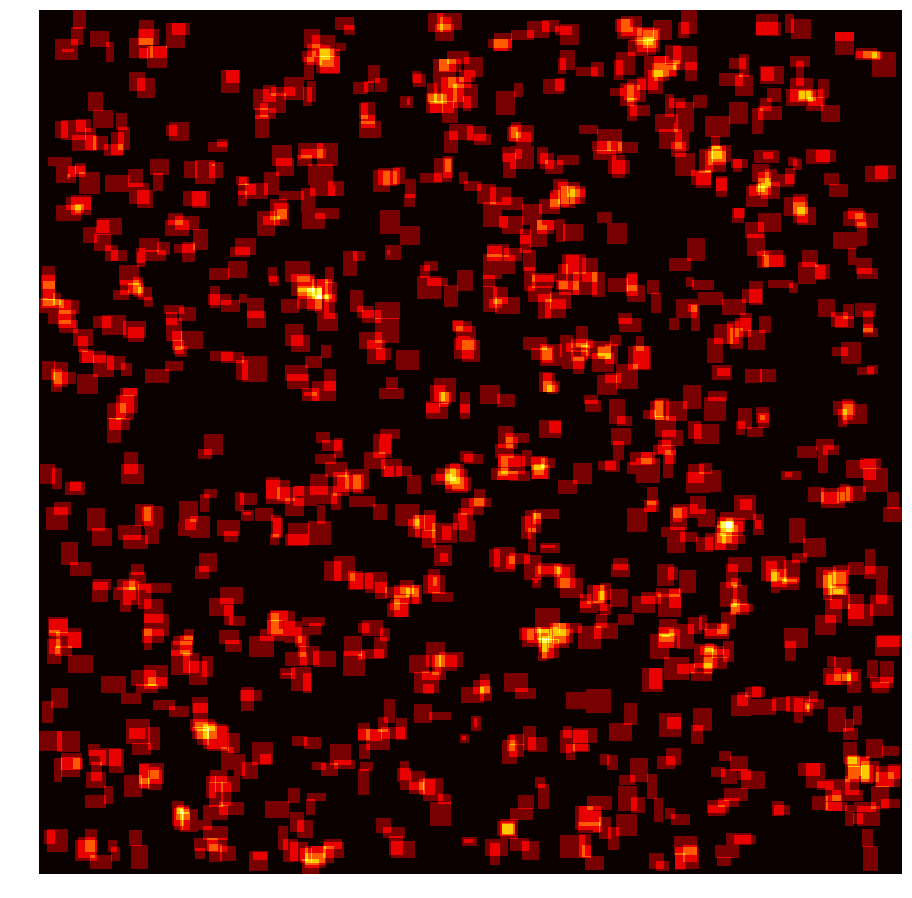

In [15]:
# https://stackoverflow.com/questions/8218608/scipy-savefig-without-frames-axes-only-content/8218887#8218887
fig = plt.figure(frameon=False)
fig.set_size_inches(12, 12)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(image_grid, cmap='hot')
plt.savefig('rects.png')
plt.show()